In [1]:
import sys
import matplotlib.pyplot as plt
import os
os.chdir('..')
sys.path.append('py')
from features_funs import *

#for visual purposes
def swap_coordinates(geometry):
    if geometry.geom_type == 'Point':
        return Point(geometry.y, geometry.x)
    elif geometry.geom_type == 'MultiPoint':
        return MultiPoint([Point(p.y, p.x) for p in geometry.geoms])
    elif geometry.geom_type == 'Polygon':
        return Polygon([(y, x) for x, y in geometry.exterior.coords])
    elif geometry.geom_type == 'MultiPolygon':
        return MultiPolygon([Polygon([(y, x) for x, y in poly.exterior.coords]) for poly in geometry.geoms])
    else:
        return geometry

In [2]:
df = pd.DataFrame(columns = ['geoData', 'group'])
for file in os.listdir('csv\\objects_coords'):
    print(f"processing {file}")
    mini_df = get_csv('objects_coords', file, cols = ['geoData'])
    mini_df['group'] = file.replace('.csv', '')
    mini_df['geoData'] = parse_str_to_polygon(mini_df['geoData'])
    df = pd.concat([df, mini_df])
    print("done")

processing adult_hospitals.csv
done
processing bus_stations.csv
done
processing bus_stops.csv
done
processing eco_boiler.csv
done
processing eco_dump.csv
done
processing eco_factory.csv
done
processing eco_thermal.csv
done
processing edu_prof.csv
done
processing edu_school.csv
done
processing kids_hospitals.csv
done
processing moscow_stations.csv
done
processing parks.csv
done
processing shops.csv
done
processing train_stations.csv
done


In [3]:
from cartopy import crs as ccrs
df = create_gdf(df)
df['dist'] = df['geometry'].apply(lambda x: closest_dist_geo_obj(Point((55.755787, 37.617764)), x)/1000)
df = df.query("dist < 50")

In [4]:
df['swapped_geometry'] = df.geometry.apply(swap_coordinates)
df = df.set_geometry('swapped_geometry')

In [5]:
from matplotlib.lines import Line2D
import contextily as cx
import matplotlib.pyplot as plt

def plot_group(df, 
               colors = None, 
               marker_size = 0.1,
               fig_size = (10, 10),
               show_legend = False
    ):
    
    if colors is None:
        cmap = plt.cm.Set1
        unique_groups = df['group'].unique()
        colors = {group: cmap(i / len(unique_groups)) 
                  for i, group 
                  in enumerate(unique_groups)
                 }
    
    
    
    #plot setup
    fig, ax = plt.subplots(figsize = fig_size)
    
    
    #groups plotting
    for group, color in colors.items():
        (
         df[df['group'] == group]
          .to_crs('EPSG:3857')
          .plot(ax = ax, 
                color = color, 
                label = group, 
                markersize = marker_size
          )
        )
    
    
    #map img
    cx.add_basemap(ax)
    
    
    #legend
    legend_elements = [Line2D([0], 
                              [0], 
                              marker='o', 
                              color='w', 
                              markerfacecolor=color, 
                              markersize=10, 
                              label=group
                        )
                       for group, color 
                       in colors.items()
                      ]

    if show_legend:
        ax.legend(handles = legend_elements, 
                  loc = "upper right",
                  ncol = 3,
                  fontsize = 8
        )
    
    #final show
    plt.show()

def filter_df(df, group_list):
    return df[df['group'].isin(group_list)]

def get_group_with_pattern(df, pattern):
    return df[df['group'].str.contains(pattern)]['group'].unique()

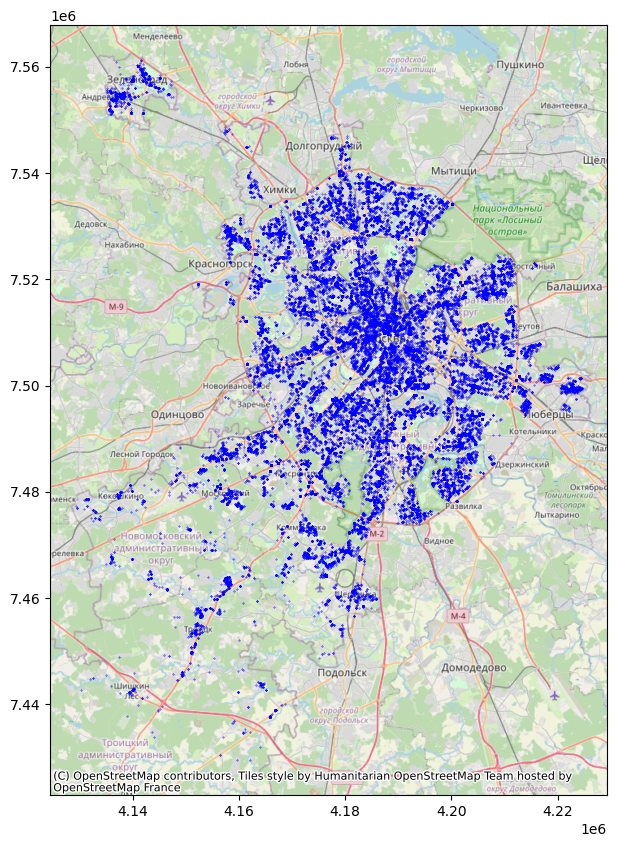

In [6]:
plot_group(filter_df(df, ['shops']), 
           colors = {"shops": "blue"}
)

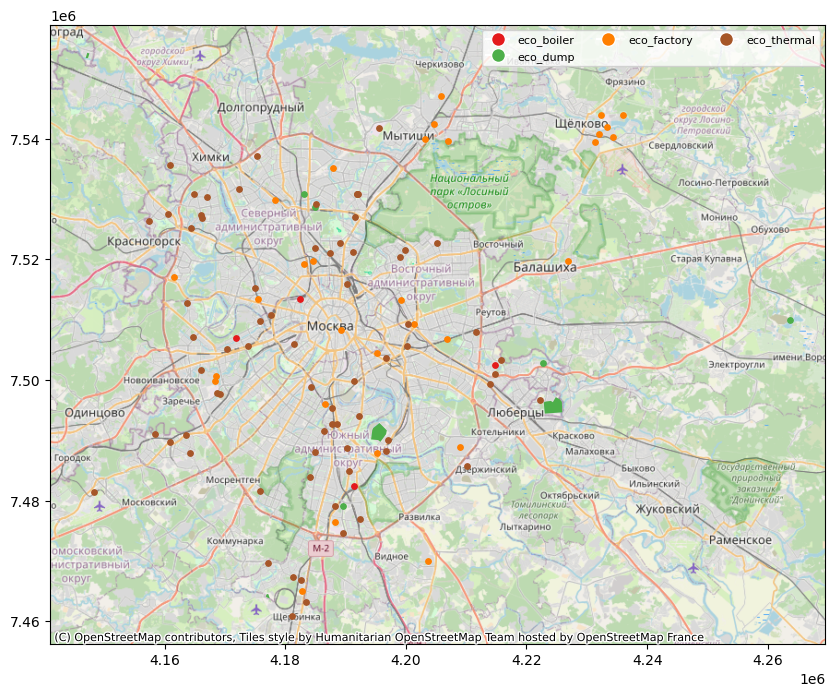

In [7]:
plot_group(filter_df(df, 
                     get_group_with_pattern(df, 
                                            'eco'
                     )
            ), 
           show_legend = True, 
           marker_size = 15
)

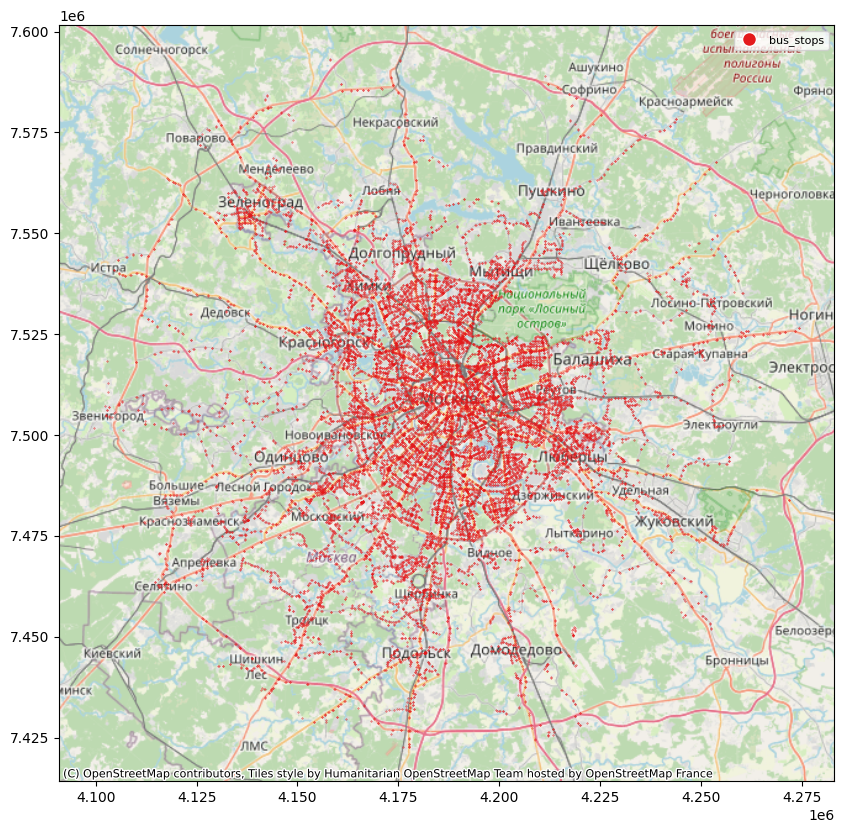

In [8]:
plot_group(filter_df(df, 
                     get_group_with_pattern(df, 
                                            'bus_stop'
                     )
            ), 
           show_legend = True, 
           marker_size = 0.1
)

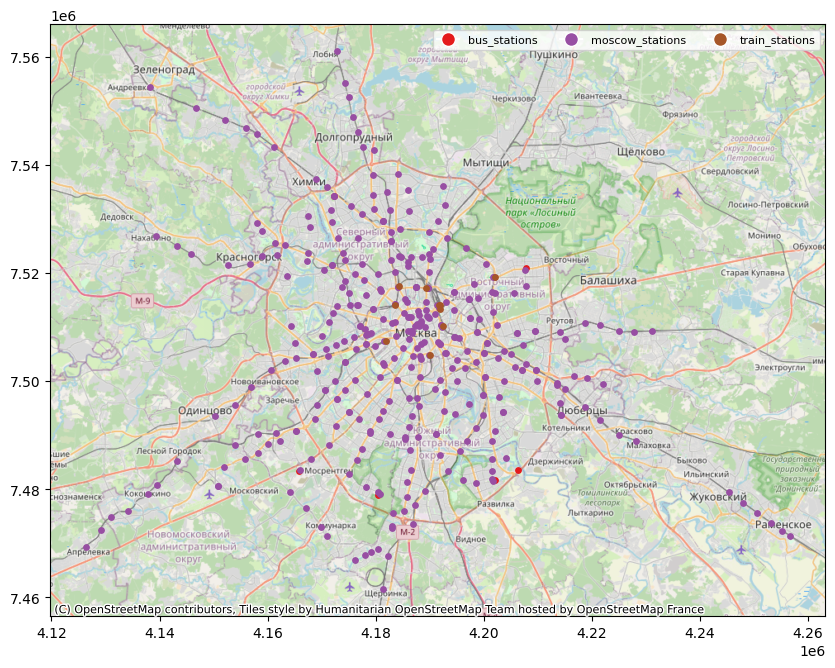

In [9]:
plot_group(filter_df(df, 
                     get_group_with_pattern(df, 
                                            'station'
                     )
            ), 
           show_legend = True, 
           marker_size = 15
)

C:\Users\UBAN\AppData\Local\Temp\ipykernel_11332\970867716.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  edu_df['swapped_geometry'] = edu_df['swapped_geometry'].centroid


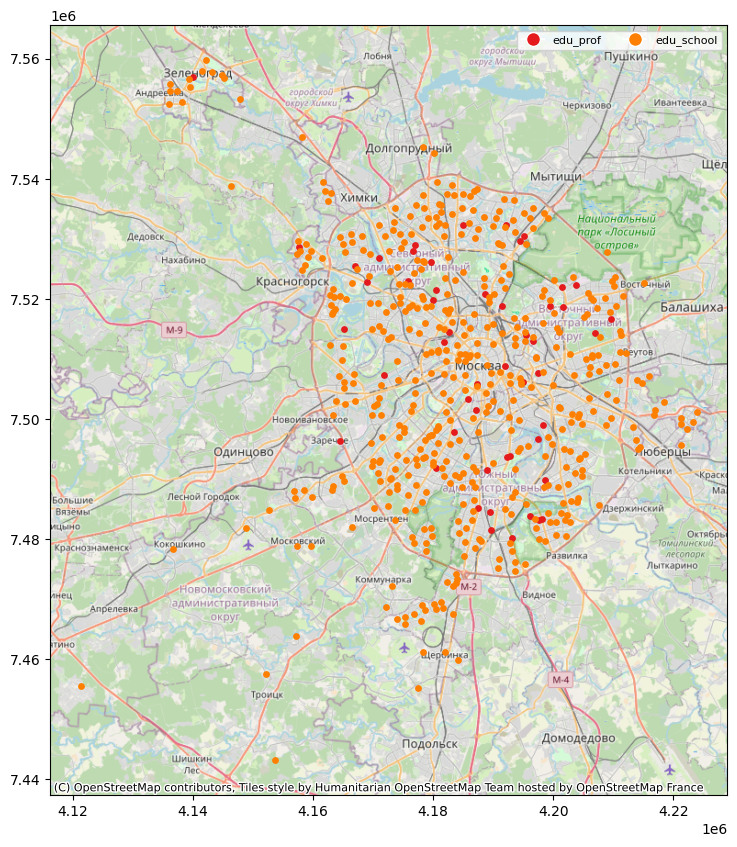

In [10]:
edu_df = df.copy()
edu_df['swapped_geometry'] = edu_df['swapped_geometry'].centroid
edu_df = edu_df.set_geometry('swapped_geometry')
plot_group(filter_df(edu_df, 
                     get_group_with_pattern(edu_df, 
                                            'edu'
                     )
            ), 
           show_legend = True, 
           marker_size = 15
)

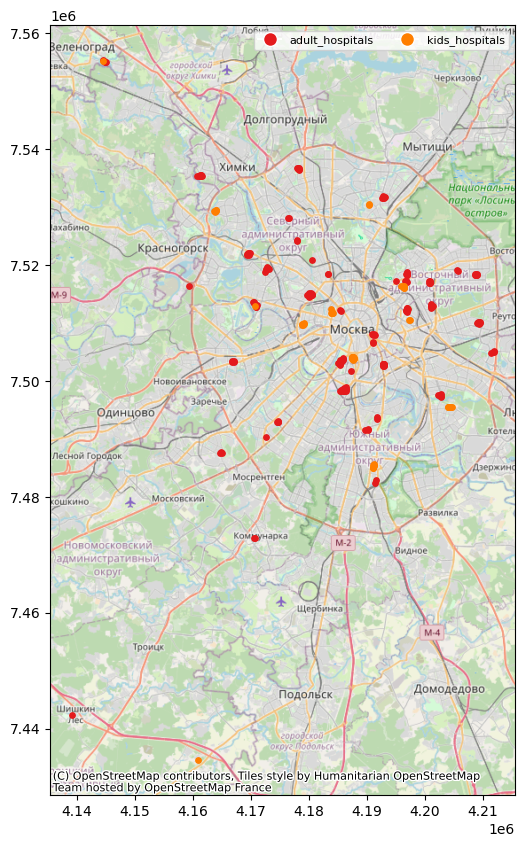

In [11]:
plot_group(filter_df(df, 
                     get_group_with_pattern(df, 
                                            'hospit'
                     )
            ), 
           show_legend = True, 
           marker_size = 15
)

In [12]:
plot_group(filter_df(df, 
                     'park'
            ), 
           show_legend = True, 
           marker_size = 1,
           colors = {"parks": "green"}
)

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`